In [3]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
# Cargando los datos
with open('./X.pkl','rb') as f:
    X = pickle.load(f)

In [5]:
train_split = pd.read_csv('./train_split.csv')

In [6]:
# Preparando las etiquetas
y = pd.get_dummies(train_split['class'])

In [7]:
# Guardar el mapeo de las clases
class_mapping = {n: i for i, n in enumerate(y.columns)}

# Guardar el mapeo a un archivo
with open('class_mapping.pkl', 'wb') as f:
    pickle.dump(class_mapping, f)

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [9]:
# Definir la arquitectura de la CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [10]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir el criterio de EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Entrenar el modelo con EarlyStopping
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16, callbacks=[es])


Epoch 1/20
150/150 [==============================] - 163s 1s/step - loss: 0.6477 - accuracy: 0.8254 - val_loss: 0.5548 - val_accuracy: 0.8300
Epoch 2/20
150/150 [==============================] - 162s 1s/step - loss: 0.5678 - accuracy: 0.8304 - val_loss: 0.5595 - val_accuracy: 0.8300
Epoch 3/20
150/150 [==============================] - 170s 1s/step - loss: 0.5560 - accuracy: 0.8304 - val_loss: 0.5428 - val_accuracy: 0.8300
Epoch 4/20
150/150 [==============================] - 167s 1s/step - loss: 0.5418 - accuracy: 0.8304 - val_loss: 0.5218 - val_accuracy: 0.8300
Epoch 5/20
150/150 [==============================] - 165s 1s/step - loss: 0.5318 - accuracy: 0.8304 - val_loss: 0.5237 - val_accuracy: 0.8300
Epoch 6/20
150/150 [==============================] - 156s 1s/step - loss: 0.5024 - accuracy: 0.8300 - val_loss: 0.5054 - val_accuracy: 0.8300
Epoch 7/20
150/150 [==============================] - 145s 966ms/step - loss: 0.4700 - accuracy: 0.8317 - val_loss: 0.5120 - val_accuracy: 0.8

In [12]:
# Evaluar el modelo
results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')

The accuracy on the test set is of 0.80


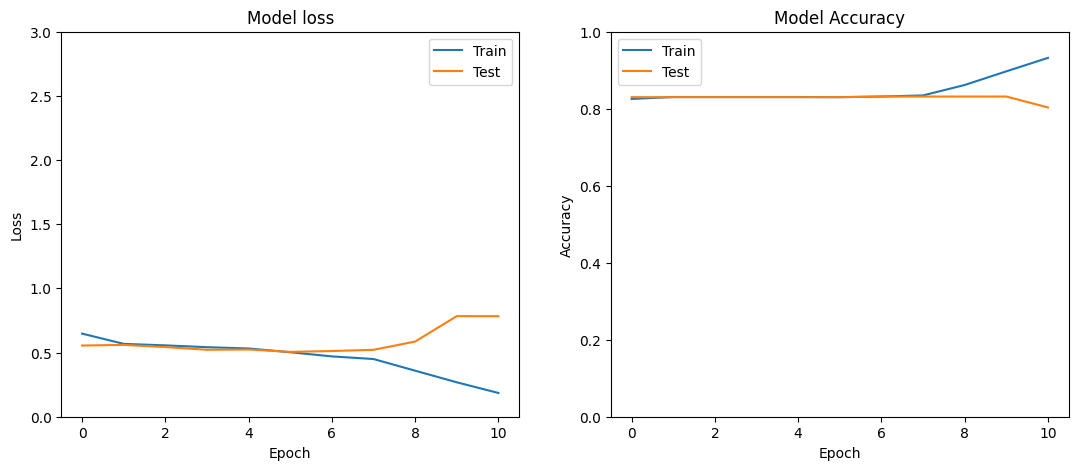

In [13]:
import matplotlib.pyplot as plt    
%matplotlib inline

# Metricas para evaluar el modelo

def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(13,5))
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    if title:
        fig.suptitle(title)

plot_loss_accuracy(history)

In [14]:
# Guardar el modelo en formato HDF5
model.save('cnn.h5')  # Crea un archivo HDF5 'mi_modelo.h5'

# Guardar el modelo en formato TensorFlow SavedModel
model.save('cnn')  # Crea una carpeta 'mi_modelo'


C:\Users\barre\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: cnn\assets


INFO:tensorflow:Assets written to: cnn\assets
